In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
data = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
data.shape

(52310, 11)

In [4]:
test.shape

(22421, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52310 entries, 0 to 52309
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    52310 non-null  int64  
 1   Agency                52310 non-null  object 
 2   Agency Type           52310 non-null  object 
 3   Distribution Channel  52310 non-null  object 
 4   Product Name          52310 non-null  object 
 5   Duration              52310 non-null  int64  
 6   Destination           52310 non-null  object 
 7   Net Sales             52310 non-null  float64
 8   Commision (in value)  52310 non-null  float64
 9   Age                   52310 non-null  int64  
 10  Claim                 52310 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 4.4+ MB


In [6]:
test_id = test.iloc[:,0]

In [7]:
data.drop(columns= "ID",inplace=True)
test.drop(columns="ID",inplace=True)

In [8]:
data.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,EPX,Travel Agency,Online,Cancellation Plan,61,PHILIPPINES,12.0,0.00,41,0
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,17.0,0.00,35,0
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26,THAILAND,19.8,11.88,47,0
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,HONG KONG,27.0,0.00,48,0
4,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,MALAYSIA,37.0,0.00,36,0


In [9]:
data.rename(columns={'Agency Type':'Agency_Type', 'Distribution Channel':'Distribution_Channel', 'Product Name':'Product_Name','Net Sales':'Net_Sales', 'Commision (in value)':'Commision'},inplace=True)

In [10]:
test.rename(columns={'Agency Type':'Agency_Type', 'Distribution Channel':'Distribution_Channel', 'Product Name':'Product_Name','Net Sales':'Net_Sales', 'Commision (in value)':'Commision'},inplace=True)

In [11]:
for col in data.columns:
    print(col ,"has", data[col].unique() ,"unique values which are",data[col].nunique() ,"in total" '\n\n')

Agency has ['EPX' 'CWT' 'JZI' 'C2B' 'RAB' 'TST' 'CSR' 'JWT' 'LWC' 'SSI' 'ART' 'CCR'
 'KML' 'ADM' 'CBH' 'TTW'] unique values which are 16 in total


Agency_Type has ['Travel Agency' 'Airlines'] unique values which are 2 in total


Distribution_Channel has ['Online' 'Offline'] unique values which are 2 in total


Product_Name has ['Cancellation Plan' 'Rental Vehicle Excess Insurance'
 '2 way Comprehensive Plan' 'Basic Plan' 'Bronze Plan' 'Silver Plan'
 '1 way Comprehensive Plan' 'Value Plan' 'Annual Silver Plan'
 'Travel Cruise Protect' 'Comprehensive Plan' 'Annual Gold Plan'
 'Single Trip Travel Protect Gold' 'Single Trip Travel Protect Silver'
 'Ticket Protector' '24 Protect' 'Gold Plan' 'Annual Travel Protect Gold'
 'Annual Travel Protect Platinum' 'Single Trip Travel Protect Platinum'
 'Annual Travel Protect Silver' 'Premier Plan'
 'Individual Comprehensive Plan' 'Spouse or Parents Comprehensive Plan'
 'Child Comprehensive Plan'] unique values which are 25 in total


Duration has [  

In [12]:
data.groupby("Agency")["Net_Sales"].sum().sort_values(ascending=False)

Agency
C2B    1.000629e+06
EPX    8.779453e+05
CWT    3.141001e+05
JZI    1.469204e+05
LWC    1.006946e+05
JWT    2.966676e+04
KML    1.597342e+04
TST    1.153273e+04
TTW    9.924838e+03
RAB    9.313000e+03
ART    6.234160e+03
SSI    5.134452e+03
CCR    4.843965e+03
ADM    3.020000e+03
CBH    2.019000e+03
CSR    1.943000e+03
Name: Net_Sales, dtype: float64

In [13]:
data["Agency"].replace(['JWT','KML','TST','TTW','RAB','ART','SSI','CCR','ADM','CBH','CSR'],value="Others",inplace=True)

In [14]:
test["Agency"].replace(['JWT','KML','TST','TTW','RAB','ART','SSI','CCR','ADM','CBH','CSR'],value="Others",inplace=True)

In [15]:
data["Destination_Continent"] = data["Destination"]

In [16]:
test["Destination_Continent"] = test["Destination"]

In [17]:
data["Destination_Continent"]  = data["Destination_Continent"].replace(to_replace =['PERU','BRAZIL','COLOMBIA','ARGENTINA','VENEZUELA','BOLIVIA','CHILE'], value ="South America")

data["Destination_Continent"] = data["Destination_Continent"].replace(to_replace =['EGYPT','SPAIN','PORTUGAL','KAZAKHSTAN','TURKEY','RUSSIAN FEDERATION','GEORGIA','AZERBAIJAN'], value ="Transcontinental")  

data["Destination_Continent"] = data["Destination_Continent"].replace(to_replace =['SOUTH AFRICA','MOROCCO','MAURITIUS','KENYA','TANZANIA, UNITED REPUBLIC OF','TUNISIA','ZAMBIA','ETHIOPIA'], value ="Africa")

data["Destination_Continent"] = data["Destination_Continent"].replace(to_replace =['AUSTRALIA','NEW ZEALAND','FIJI','VANUATU','GUAM'], value='Oceania')

data["Destination_Continent"] = data["Destination_Continent"].replace(to_replace =['UNITED STATES','CANADA','MEXICO','COSTA RICA','BERMUDA'],value = 'North America')

data["Destination_Continent"] = data["Destination_Continent"].replace(to_replace =['UNITED KINGDOM','CZECH REPUBLIC','GERMANY','FRANCE','NETHERLANDS','NORWAY','FINLAND','IRELAND','ITALY','ICELAND','DENMARK','SWITZERLAND','UKRAINE','BELGIUM','HUNGARY','GREECE','SWEDEN','CYPRUS','AUSTRIA','POLAND','ROMANIA','SLOVENIA','BELARUS','MALTA','CROATIA','ESTONIA','LITHUANIA','LUXEMBOURG'], value="Europe")

data["Destination_Continent"] = data["Destination_Continent"].replace(to_replace =['PHILIPPINES','MALAYSIA','THAILAND','VIET NAM','CHINA','SINGAPORE','JAPAN','INDONESIA','UNITED ARAB EMIRATES','BRUNEI DARUSSALAM','HONG KONG','INDIA','KOREA, REPUBLIC OF','CAMBODIA','MONGOLIA','NEPAL','PAKISTAN','MYANMAR','TAIWAN, PROVINCE OF CHINA','ISRAEL','SRI LANKA','SAUDI ARABIA','MACAO','MALDIVES',"LAO PEOPLE'S DEMOCRATIC REPUBLIC",'BANGLADESH','LEBANON','OMAN','UZBEKISTAN','QATAR','JORDAN','BAHRAIN','KYRGYZSTAN','KUWAIT','BHUTAN','TURKMENISTAN'], value= "Asia")


In [18]:
test["Destination_Continent"]  = test["Destination_Continent"].replace(to_replace =['PERU','BRAZIL','COLOMBIA','ARGENTINA','VENEZUELA','BOLIVIA','CHILE'], value ="South America")

test["Destination_Continent"] = test["Destination_Continent"].replace(to_replace =['EGYPT','SPAIN','PORTUGAL','KAZAKHSTAN','TURKEY','RUSSIAN FEDERATION','GEORGIA','AZERBAIJAN'], value ="Transcontinental")  

test["Destination_Continent"] = test["Destination_Continent"].replace(to_replace =['SOUTH AFRICA','MOROCCO','MAURITIUS','KENYA','TANZANIA, UNITED REPUBLIC OF','TUNISIA','ZAMBIA','ETHIOPIA'], value ="Africa")

test["Destination_Continent"] = test["Destination_Continent"].replace(to_replace =['AUSTRALIA','NEW ZEALAND','FIJI','VANUATU','GUAM'], value='Oceania')

test["Destination_Continent"] = test["Destination_Continent"].replace(to_replace =['UNITED STATES','CANADA','MEXICO','COSTA RICA','BERMUDA'],value = 'North America')

test["Destination_Continent"] = test["Destination_Continent"].replace(to_replace =['UNITED KINGDOM','CZECH REPUBLIC','GERMANY','FRANCE','NETHERLANDS','NORWAY','FINLAND','IRELAND','ITALY','ICELAND','DENMARK','SWITZERLAND','UKRAINE','BELGIUM','HUNGARY','GREECE','SWEDEN','CYPRUS','AUSTRIA','POLAND','ROMANIA','SLOVENIA','BELARUS','MALTA','CROATIA','ESTONIA','LITHUANIA','LUXEMBOURG'], value="Europe")

test["Destination_Continent"] = test["Destination_Continent"].replace(to_replace =['PHILIPPINES','MALAYSIA','THAILAND','VIET NAM','CHINA','SINGAPORE','JAPAN','INDONESIA','UNITED ARAB EMIRATES','BRUNEI DARUSSALAM','HONG KONG','INDIA','KOREA, REPUBLIC OF','CAMBODIA','MONGOLIA','NEPAL','PAKISTAN','MYANMAR','TAIWAN, PROVINCE OF CHINA','ISRAEL','SRI LANKA','SAUDI ARABIA','MACAO','MALDIVES',"LAO PEOPLE'S DEMOCRATIC REPUBLIC",'BANGLADESH','LEBANON','OMAN','UZBEKISTAN','QATAR','JORDAN','BAHRAIN','KYRGYZSTAN','KUWAIT','BHUTAN','TURKMENISTAN'], value= "Asia")


In [19]:
data.drop(columns="Destination",inplace=True)
test.drop(columns="Destination",inplace=True)

In [20]:
data['Age'] = data['Age'].apply(lambda x: x if x <= 100 else np.mean(data["Age"]))
test['Age'] = test['Age'].apply(lambda x: x if x <= 100 else np.mean(data["Age"]))

In [21]:
data["Duration"] = data['Duration'].apply(lambda x: x if x > 0 else np.mean(data["Duration"]))
test["Duration"] = test['Duration'].apply(lambda x: x if x > 0 else np.mean(data["Duration"]))

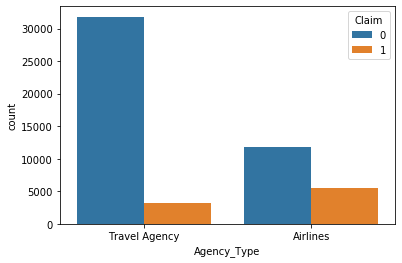

In [22]:
sns.countplot(x="Agency_Type", hue="Claim", data=data);

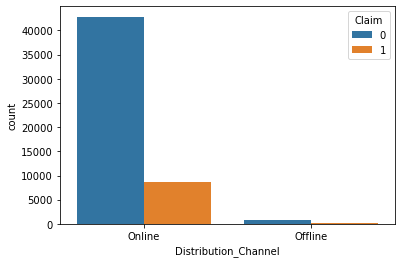

In [23]:
sns.countplot(x="Distribution_Channel", hue="Claim", data=data);

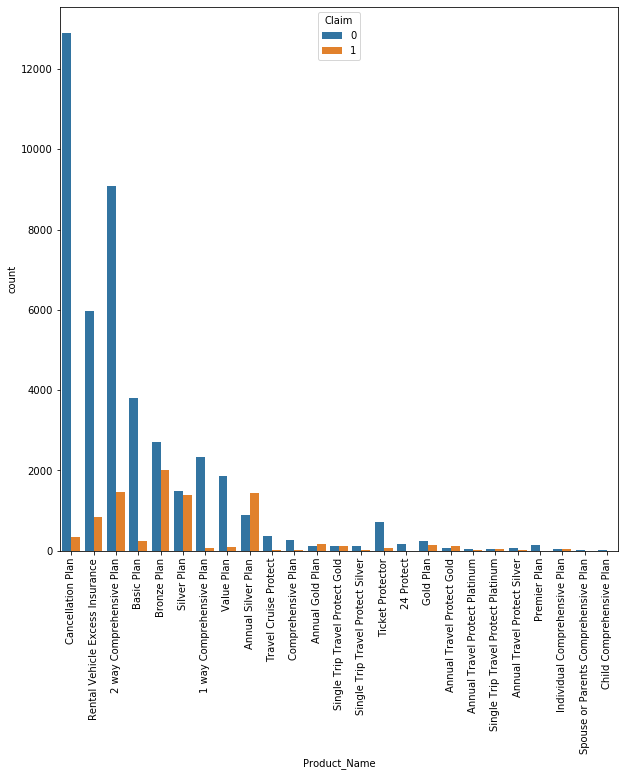

In [24]:
plt.figure(figsize=(10,10))
sns.countplot(x="Product_Name", hue="Claim", data=data)
plt.xticks(rotation=90)
plt.show();

In [25]:
numerical_columns = data.select_dtypes(include=np.number)

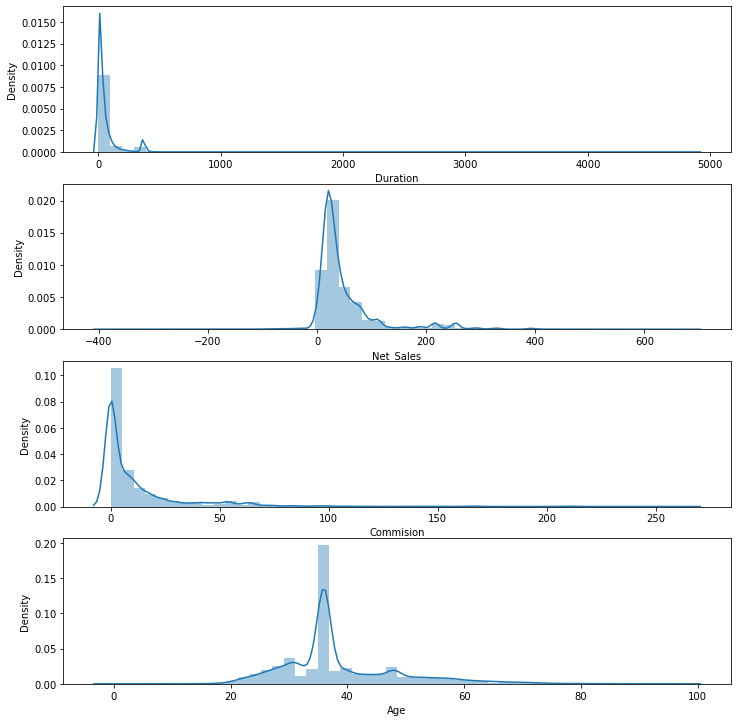

In [26]:
fig,axes = plt.subplots(4,1,figsize=(10,10))
fig.tight_layout()
for i,col in enumerate(numerical_columns.columns[:4]):
    sns.distplot(data[col],ax=axes[i])
plt.show();

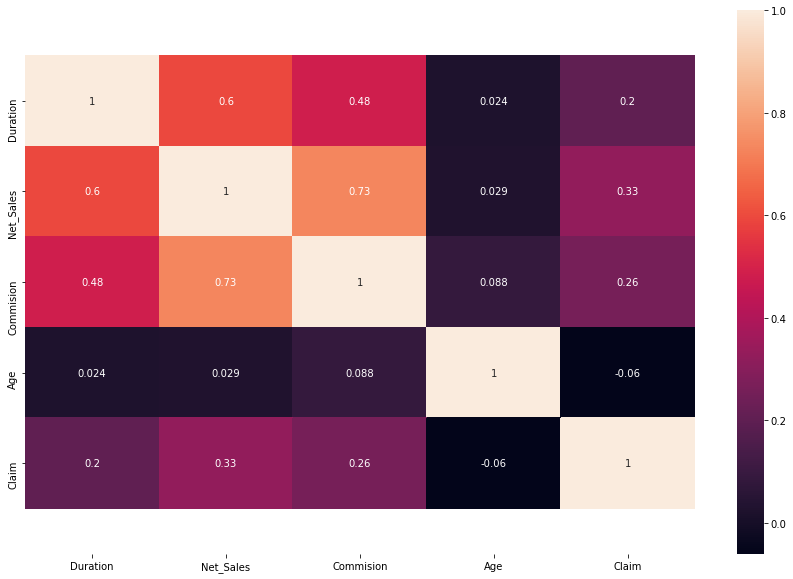

In [27]:
plt.figure(figsize=(15,10))
ax = sns.heatmap(data.corr(),annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show();

In [28]:
data["Agency_Type"] = data["Agency_Type"].apply(lambda x: 1 if x == "Travel Agency" else 0)
test["Agency_Type"] = test["Agency_Type"].apply(lambda x: 1 if x == "Travel Agency" else 0)

In [29]:
data["Distribution_Channel"] = data["Distribution_Channel"].apply(lambda x: 1 if x == "Online" else 0)
test["Distribution_Channel"] = test["Distribution_Channel"].apply(lambda x: 1 if x == "Online" else 0)

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
le = LabelEncoder()

In [32]:
col = ["Agency","Destination_Continent"]
for i in col:
    data[i] = le.fit_transform(data[i])
    test[i] = le.transform(test[i])

In [33]:
data.head()

,Agency,Agency_Type,Distribution_Channel,Product_Name,Duration,Net_Sales,Commision,Age,Claim,Destination_Continent
0,2,1,1,Cancellation Plan,61.0,12.0,0.00,41.0,0,1
1,2,1,1,Cancellation Plan,4.0,17.0,0.00,35.0,0,1
2,1,1,1,Rental Vehicle Excess Insurance,26.0,19.8,11.88,47.0,0,1
3,2,1,1,2 way Comprehensive Plan,15.0,27.0,0.00,48.0,0,1
4,2,1,1,2 way Comprehensive Plan,15.0,37.0,0.00,36.0,0,1


In [34]:
data.shape

(52310, 10)

In [35]:
df = data.join(pd.get_dummies(data['Product_Name']))

In [36]:
test_df = test.join(pd.get_dummies(test['Product_Name']))

In [37]:
df.drop(columns="Product_Name",inplace=True)
test_df.drop(columns="Product_Name",inplace=True)

In [38]:
df.head()

,Agency,Agency_Type,Distribution_Channel,Duration,Net_Sales,Commision,Age,Claim,Destination_Continent,1 way Comprehensive Plan,...,Premier Plan,Rental Vehicle Excess Insurance,Silver Plan,Single Trip Travel Protect Gold,Single Trip Travel Protect Platinum,Single Trip Travel Protect Silver,Spouse or Parents Comprehensive Plan,Ticket Protector,Travel Cruise Protect,Value Plan
0,2,1,1,61.0,12.0,0.00,41.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,4.0,17.0,0.00,35.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,26.0,19.8,11.88,47.0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,2,1,1,15.0,27.0,0.00,48.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2,1,1,15.0,37.0,0.00,36.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
test_df.iloc[:15693,:]

,Agency,Agency_Type,Distribution_Channel,Duration,Net_Sales,Commision,Age,Destination_Continent,1 way Comprehensive Plan,2 way Comprehensive Plan,...,Premier Plan,Rental Vehicle Excess Insurance,Silver Plan,Single Trip Travel Protect Gold,Single Trip Travel Protect Platinum,Single Trip Travel Protect Silver,Spouse or Parents Comprehensive Plan,Ticket Protector,Travel Cruise Protect,Value Plan
0,2,1,1,192.0,18.0,0.00,36.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,2.0,20.0,0.00,36.0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,13.0,13.5,3.38,24.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,1,1,133.0,41.0,0.00,36.0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,2.0,30.0,7.50,32.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15688,2,1,1,32.0,16.0,0.00,36.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
15689,0,0,1,10.0,27.0,6.75,25.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
15690,0,0,1,365.0,216.0,54.00,49.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
15691,2,1,1,71.0,20.0,0.00,45.0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [40]:
X = df.drop(columns='Claim')

In [41]:
y = df["Claim"]

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score , roc_curve,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [44]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=0.01,penalty='l2')
lr.fit(X_train,y_train)
y_pred_log = lr.predict(X_test)

LogisticRegression(C=0.01)

In [45]:
lr.score(X_test,y_test)
confusion_matrix(y_test,y_pred_log)
precision_score(y_test,y_pred_log)

0.8488498056458293

array([[12675,   404],
       [ 1968,   646]], dtype=int64)

0.6152380952380953

In [46]:
rf = RandomForestClassifier(random_state=0,max_depth=50,n_estimators=100,min_samples_split=10)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print('\n',precision_score(y_test,y_pred))

RandomForestClassifier(max_depth=50, min_samples_split=10, random_state=0)


 0.8352614530310042


In [47]:
from sklearn.ensemble import BaggingClassifier

In [48]:
bagging = BaggingClassifier(base_estimator= RandomForestClassifier(), n_estimators=10,random_state=0,n_jobs=-1)
bagging.fit(X_train,y_train)
y_pred_bagging = bagging.predict(X_test)

BaggingClassifier(base_estimator=RandomForestClassifier(), n_jobs=-1,
                  random_state=0)

In [49]:
bagging.score(X_test,y_test)
confusion_matrix(y_test,y_pred_bagging)
precision_score(y_test,y_pred_bagging)

0.9260179697954501

array([[12661,   418],
       [  743,  1871]], dtype=int64)

0.8173875054609

In [50]:
from sklearn.ensemble import GradientBoostingClassifier
gbclf = GradientBoostingClassifier(random_state=0,n_estimators=80,learning_rate=0.01,max_depth=5)
gbclf.fit(X_train,y_train)
y_pred_gb = gbclf.predict(X_test)
print('\n',precision_score(y_test,y_pred_gb))

GradientBoostingClassifier(learning_rate=0.01, max_depth=5, n_estimators=80,
                           random_state=0)


 1.0


In [51]:
print('Train acc:',gbclf.score(X_train,y_train))
print('Test acc:',gbclf.score(X_test,y_test))
confusion_matrix(y_test,y_pred_gb)
print(precision_score(y_test,y_pred_gb))
recall_score(y_test,y_pred_gb)
f1_score(y_test,y_pred_gb)

Train acc: 0.8346942676898709
Test acc: 0.8348308162875168


array([[13079,     0],
       [ 2592,    22]], dtype=int64)

1.0


0.008416220351951033

0.01669195751138088

In [52]:
pd.crosstab(y_test,y_pred_gb)

col_0,0,1
Claim,,
0,13079,0
1,2592,22


In [53]:
from xgboost import XGBClassifier

In [54]:
xgbclf = XGBClassifier(random_state=0,max_depth=7,scale_pos_weight=0.1,n_estimators=96)
xgbclf.fit(X_train,y_train)
y_pred_xgbclf = xgbclf.predict(X_test)
precision_score(y_test,y_pred_xgbclf)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=96, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=0.1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

0.9841986455981941

In [55]:
xgbclf.score(X_test,y_test)
confusion_matrix(y_test,y_pred_xgbclf)
precision_score(y_test,y_pred_xgbclf)

0.8607659466003951

array([[13072,     7],
       [ 2178,   436]], dtype=int64)

0.9841986455981941

In [56]:
test.head()

,Agency,Agency_Type,Distribution_Channel,Product_Name,Duration,Net_Sales,Commision,Age,Destination_Continent
0,2,1,1,Cancellation Plan,192.0,18.0,0.00,36.0,1
1,2,1,1,1 way Comprehensive Plan,2.0,20.0,0.00,36.0,1
2,0,0,1,Bronze Plan,13.0,13.5,3.38,24.0,1
3,2,1,1,2 way Comprehensive Plan,133.0,41.0,0.00,36.0,1
4,0,0,1,Silver Plan,2.0,30.0,7.50,32.0,1


In [104]:
test_submission = gbclf.predict(test_df)

In [105]:
submission = pd.DataFrame({"ID":test_id,"Claim":test_submission})

In [106]:
submission.to_csv("submission.csv",index=False)